In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
Pi=np.pi
from scipy.integrate import odeint

In [8]:
def makeDirectionField(xvals, yvals, fun):
    XVALS, YVALS = np.meshgrid(xvals, yvals)

    u, v = np.zeros(XVALS.shape), np.zeros(YVALS.shape)

    N_Rows, N_Cols = XVALS.shape

    for i in range(N_Rows):
        for j in range(N_Cols):
            x = XVALS[i, j]
            y = YVALS[i, j]
            diffVals = fun([x, y], t)
            u[i,j] = diffVals[0]
            v[i,j] = diffVals[1]   

    Q = plt.quiver(XVALS, YVALS, np.sign(u)/np.sqrt(2.), np.sign(v)/np.sqrt(2.), color='k', scale_units='xy', angles='xy', scale=8, headaxislength=0)

In [9]:
def makePath(x0, t, fun, plotColor):
    # The variable 'plotColor' is either set to 'bw' or 'clr'.  
    # 'fun' is the right hand side of your ODE.  
    Nstarting=np.size(x0,0)
    if plotColor == 'bw':
        colors = np.zeros([Nstarting, 3])
    elif plotColor == 'clr':
        cmap = plt.get_cmap('winter')
        colors = [cmap(i) for i in np.linspace(0, 1, Nstarting)]

    for ii in range(Nstarting):
        thisX0=x0[ii,:]
        x = odeint(fun, thisX0, t)
        plt.quiver(x[:-1, 0],x[:-1, 1],x[1:, 0]-x[:-1, 0],x[1:, 1]-x[:-1, 1], color=colors[ii], scale_units='xy', angles='xy', scale=1)
    
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

In [10]:
def vanDerPol(X, t):
    x, y = X
    dx = y
    dy = -x+y*(1-x**2)

    return [dx, dy]

C:\Users\ccurtis\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


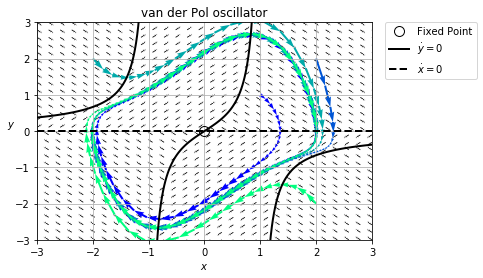

In [11]:
t = np.arange(0, 10, 0.1)
x0 = np.array([[1,1], [2,2], [-2, 2], [2, -2]])

xmin=-3; xmax=3; ymin=-3; ymax=3;
xvals = np.linspace(xmin, xmax, 30)
yvals = np.linspace(ymin, ymax, 30)
makeDirectionField(xvals, yvals, vanDerPol)
makePath(x0, t, vanDerPol, 'clr')


x1=np.linspace(xmin, -1-.05, 100)
x2=np.linspace(-1+.05, 1-.05, 100)
x3=np.linspace(1+.05, xmax, 100)

plt.plot(0,0, 'ko', markersize=10,  mfc='none', label='Fixed Point')
xx=x1; plt.plot(xx, xx/(1-xx**2), 'k-', linewidth=2)
xx=x2; plt.plot(xx, xx/(1-xx**2), 'k-', linewidth=2)
xx=x3; plt.plot(xx, xx/(1-xx**2), 'k-', linewidth=2, label='$\dot{y}=0$')
plt.plot(xvals, np.zeros_like(xvals), 'k--', linewidth=2, label='$\dot{x}=0$')
plt.xlabel('$x$')    
plt.ylabel('$y$', rotation=0)
plt.title('van der Pol oscillator')
plt.grid('on')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()

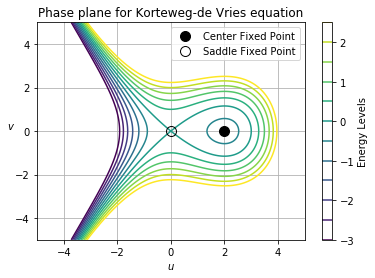

In [12]:
c=1.
u=np.linspace(-5, 5, 500)
v=np.linspace(-5, 5, 500)
U, V=np.meshgrid(u,v)

Pot=(1./6.)*U**3.-(c/2.)*U**2.
E=0.5*V**2.+Pot

plt.contour(U,V,E,np.arange(-3, 3, .5))
cbar=plt.colorbar()
cbar.ax.set_ylabel('Energy Levels')

plt.plot(2*c, 0, 'ko', markersize=10,  mfc='black', label='Center Fixed Point')
plt.plot(0, 0, 'ko', markersize=10,  mfc='none', label='Saddle Fixed Point')


plt.xlabel('$u$')    
plt.ylabel('$v$', rotation=0)
plt.title('Phase plane for Korteweg-de Vries equation')
plt.grid('on')

plt.legend()

plt.show()